<h1>Cadeias de Markov com Python</h1>

Cadeias de Markov são modelos que descrevem uma sequência de eventos dos quais a probabilidade da ocorrência de cada evento, depende apenas da ocorrência anterior e não de toda sequência. Vejamos um exemplo:

<h3>Pepsi vs Coca</h3>

Suponha que determinada pessoa, ou um grupo de pessoas, só bebe Coca ou só bebe Pepsi, além de seguir as seguintes regras:

- Ele bebe apenas uma lata por semana.
- Se ele bebeu Pepsi em uma determinada semana, na próxima ele vai beber Pepsi com probabilidade de 70% ou vai beber Coca com probabilidade de 30%. Essas probabilidades são fixas na sequência de eventos.
- Se ele bebeu Coca em uma determinada semana, na próxima ele vai beber Pepsi com probabilidade de 10% ou vai beber Coca com probabilidade de 90%. Essas probabilidades são fixas na sequência de eventos.

Os números nesse exemplo são fictícios. Além disso, as probabilidades no mundo real são alteradas por campanhas de marketing e outros eventos. O exemplo acima é simplesmente para entender como as cadeias de markov funcionam. Considere a seguinte pergunta:

<i>Supondo que, nessa semana, 40%  de um grupo de pessoas tenham bebido Pepsi e 60% tenham bebido Coca. Qual a porcentagem provável de pessoas, desse mesmo grupo, beberão Coca na semana seguinte?</i>

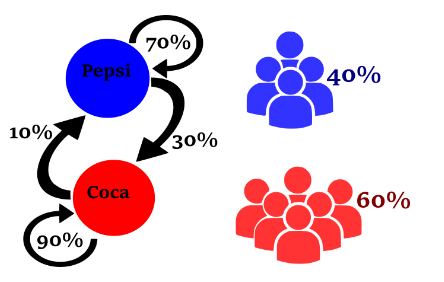

- Figura coletado no linux ctlr+ alt+ shift +r

Em forma matricial, podemos representar esse processo do seguinte modo:

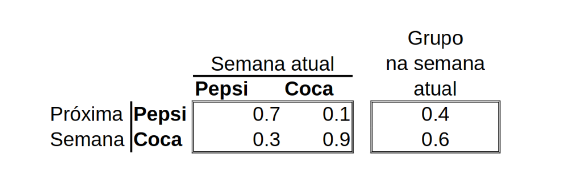

Denotando por Pi e Ci as porcentagens de pessoas que beberam Pepsi e Coca na semana i respectivamente, temos as seguintes propriedades:

$$\begin{array}[rcl]\\
p\left(P_{i+1} | P_i \right) & = & 0.7\\
p\left(C_{i+1} | P_i \right) & = & 0.3\\
p\left(P_{i+1} | C_i \right) & = & 0.1\\
p\left(C_{i+1} | C_i \right) & = & 0.9\\
\end{array}$$

Usando o Teorema de Bayes temos:

$$\begin{array}[ccc]\\
p(P_{i+1}) & = & p(P_{i+1}|P_{i})p(P_{i}) + p(P_{i+1}|C_{i})p(C_{i})
\end{array}$$

$$\begin{array}[ccc]\\
p(C_{i+1}) & = & p(C_{i+1}|P_{i})p(P_{i}) + p(C_{i+1}|C_{i})p(C_{i}) \\
\end{array}$$

Para o nosso exemplo, supondo que essa semana seja a semana 1 e a semana seguinte seja a semana 2:

$$\begin{array}[ccc]\\
p(P_2) & = & p(P_2|P_1)p(P_1) + p(P_2|C_1)p(C_1) \\
& = & 0.7 * 0.4 + 0.1 * 0.6 \\
& = & 0.34
\end{array}$$

$$\begin{array}[ccc]\\
p(C_2) & = & p(C_2|P_1)p(P_1) + p(C_2|C_1)p(C_1) \\
& = & 0.3 * 0.4 + 0.9 * 0.6 \\
& = & 0.66
\end{array}$$

Logo, é provável que 66% das pessoas no grupo tomem Coca na semana seguinte.

Agora, observe a segunda igualdade de cada uma das expressões acima. Elas são obtidas da multiplicação da matriz de probabilidade pelo vetor de porcentagens do grupo na semana atual:

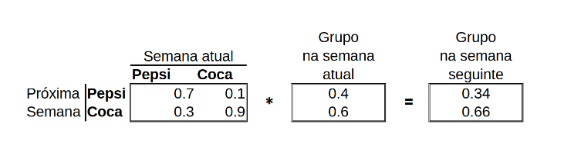

Isso quer dizer que, para encontrar as porcentagens após duas semanas, basta multiplicar a matriz de probabilidades duas vezes!

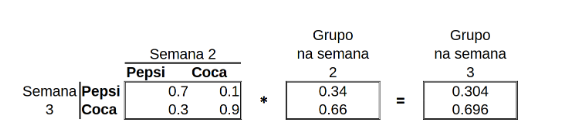

Para conferir as contas acima, usaremos Python e a biblioteca numpy:

In [1]:

#!pip install numpy

In [2]:
# importando numpy
import numpy as np

# definindo a matriz
# probabilidades semana 1
M1 = np.array([
    [0.7, 0.1],
    [0.3, 0.9]
])

# calculando a matriz
# probabilidades semana 2
M2 = np.linalg.matrix_power(M1, 2)

# definindo grupo
# semana 1
grupo_semana1 = np.array([
    [0.4],
    [0.6]
])

# calculando grupo
# semana 3
grupo_semana3 = np.matmul(M2, grupo_semana1)
print(grupo_semana3)

[[0.304]
 [0.696]]


De forma geral, para descobrirmos como estará a preferência dos usuários na 11ª semana, podemos fazer o seguinte cálculo:

$$\left(\begin{array}[cc]\\ 0.7 & 0.1 \\ 0.3 & 0.9 \\ \end{array}\right)^{10}\left(\begin{array}[c] \\
0.4 \\
0.6 \\
\end{array}\right) = \left(
\begin{array}[c]\\ ? \\ ? \\ \end{array}\right)$$

O código nesse caso fica:

In [3]:
# importando numpy
import numpy as np

# definindo a matriz
# probabilidades semana 1
M1 = np.array([
    [0.7, 0.1],
    [0.3, 0.9]
])

# calculando a matriz
# probabilidades semana 10
M10 = np.linalg.matrix_power(M1, 10)

# definindo grupo
# semana 1
grupo_semana1 = np.array([
    [0.4],
    [0.6]
])

# calculando grupo
# semana 10
grupo_semana11 = np.matmul(M10, grupo_semana1)
print(grupo_semana11)

[[0.25090699]
 [0.74909301]]


E temos nossa resposta:

$$\left(\begin{array}[cc]\\ 0.7 & 0.1 \\ 0.3 & 0.9 \\ \end{array}\right)^{10}\left(\begin{array}[c] \\
0.4 \\
0.6 \\
\end{array}\right) = \left(
\begin{array}[c]\\ 0.25 \\ 0.75 \\ \end{array}\right)$$

In [5]:
# importando numpy
import numpy as np

# definindo a matriz
# probabilidades semana 1
M1 = np.array([
    [0.7, 0.1],
    [0.3, 0.9]
])

# calculando a matriz
# probabilidades semana 3
M03= np.linalg.matrix_power(M1, 3)

# definindo grupo
# semana 1
grupo_semana1 = np.array([
    [0.4],
    [0.6]
])

# calculando grupo
# semana 10
grupo_semana11 = np.matmul(M03, grupo_semana1)
print(grupo_semana11)

[[0.2824]
 [0.7176]]


$$\left(\begin{array}[cc]\\ 0.7 & 0.1 \\ 0.3 & 0.9 \\ \end{array}\right)^{3}\left(\begin{array}[c] \\
0.4 \\
0.6 \\
\end{array}\right) = \left(
\begin{array}[c]\\ 0.28 \\ 0.72 \\ \end{array}\right)$$